In [9]:
import os, sys
from tkinter.tix import MAX
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
import matplotlib.pyplot as plt

def get_data_from_file(train_file):
  train_data = []
  # enter your code here (7 points)
  with open(train_file) as fp:
    lines = fp.readlines()
  for k, line in enumerate(lines):
    print("{:6d} / {:6d}".format(k+1, len(lines)), end="\r")
    img_path = os.path.join("./train", line[:-1])
    try:
      img = cv2.imread(img_path)
      img_resized = cv2.resize(img, (48, 48))
      if "cat" in line:
        label = 0
      if "dog" in line:
        label = 1
      train_data.append([img_resized, label])
    except:
      print("ERROR") 
  return train_data

def get_image_and_label(train_data):
  # enter your code here (8 points)
  X_train = []
  Y_train = []
  for n in train_data:
      X_train.append(n[0])
      Y_train.append(n[1])
  X_train=np.array(X_train)
  Y_train=np.array(Y_train)
  print(X_train.shape)
  print(Y_train.shape)
  return X_train, Y_train

def assignment4b_1():
  train_file = 'train_list.txt'
  test_file = 'test_list.txt'
  train_data = get_data_from_file(train_file)
  X_train, Y_train = get_image_and_label(train_data)
  print()  
  test_data = get_data_from_file(test_file)
  X_test, Y_test = get_image_and_label(test_data)
  print()
  print(len(train_data))
  print(train_data[0][0].shape)
  print(len(test_data))
  print(test_data[0][0].shape)

  save_path = 'dogs_cats.pkl'
  print('Saving to', save_path)
  data = {}
  data['X_train'] = X_train
  data['Y_train'] = Y_train
  data['X_test'] = X_test
  data['Y_test'] = Y_test
  pickle.dump(data, open(save_path, 'wb'))

def build_model():
  # enter your code here, and remove the following pass (15 points)
  model = tf.keras.Sequential([
    keras.layers.Input(shape=(48, 48, 3)),
    Conv2D(32, (3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)), 
    Flatten(),
    Dense(2, activation="softmax")
  ])
  return model

def assignment4b_2():
  data = pickle.load(open("dogs_cats.pkl","rb"))
  X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  model = build_model()
  model.summary()
  model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  ck_dir = "ckpt_dogcat"
  checkpoint_path = ck_dir+"/cp-{epoch:04d}.ckpt"
  cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, period=10)
  batch_size = 64
  epochs = 60
  # enter your code here (5 points)
  hist = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[cp_callback], verbose=1, validation_split=0.1, shuffle=True)
  test_loss, test_acc = model.evaluate(X_test, Y_test)
  print(f"test acc : {test_acc:.2f}")
  with open("history.pkl", "wb") as file:
    pickle.dump(hist.history, file) 

def assignment4b_3():
  # enter your code here, and remove the following pass (5 points)
  def show_train_result(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(history["accuracy"])
    ax[0].plot(history["val_accuracy"])
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("accuracy")
    ax[0].legend(["train", "val"], loc="upper left")

    ax[1].plot(history["loss"])
    ax[1].plot(history["val_loss"])
    ax[1].set_title("Model loss")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("loss")
    ax[1].legend(["train", "val"], loc="upper left")
    plt.show()
    pass
  with open("history.pkl", "rb") as file:
    hist = pickle.load(file)
  show_train_result(hist)
  pass

def assignment4b_4():
  # enter your code here, and remove the following pass (5 points)
  data = pickle.load(open("dogs_cats.pkl", "rb"))
  X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  model = build_model()
  model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
  )
  for checkpoint_id in range(10, 61, 10):
    model.load_weights(f"ckpt_dogcat/cp-00{checkpoint_id}.ckpt")
    loss, acc = model.evaluate(X_test, Y_test)
    print(f"Epochs-{checkpoint_id}, test accuracy : {acc:.4f}")
  pass


In [2]:
for i in range(10, 61, 10):
  print(i)

10
20
30
40
50
60


In [3]:
if __name__ == '__main__':
    assignment4b_1() # do not modify this line

(20000, 48, 48, 3)
(20000,)

(5000, 48, 48, 3)
(5000,)

20000
(48, 48, 3)
5000
(48, 48, 3)
Saving to dogs_cats.pkl


In [4]:
    assignment4b_2() # do not modify this line

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

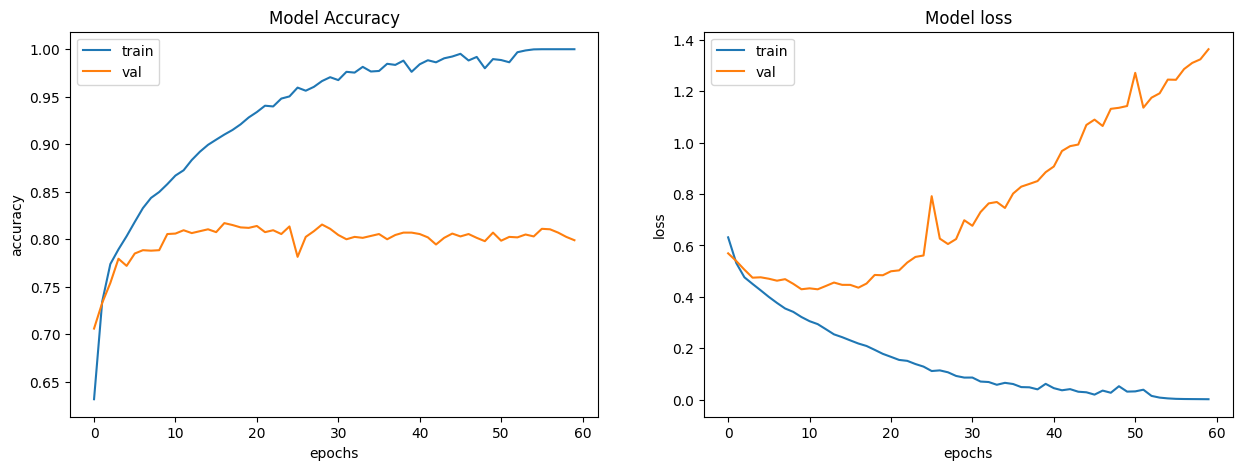

In [10]:
    assignment4b_3() # do not modify this line

In [6]:
    assignment4b_4() # do not modify this line

157/157 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8174
Epochs-10, test accuracy : 0.8174
157/157 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8260
Epochs-20, test accuracy : 0.8260
157/157 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.8268
Epochs-30, test accuracy : 0.8268
157/157 [==============================] - 0s 2ms/step - loss: 0.8125 - accuracy: 0.8188
Epochs-40, test accuracy : 0.8188
157/157 [==============================] - 0s 2ms/step - loss: 1.0076 - accuracy: 0.8216
Epochs-50, test accuracy : 0.8216
157/157 [==============================] - 0s 2ms/step - loss: 1.2171 - accuracy: 0.8266
Epochs-60, test accuracy : 0.8266


# Question 1 (5 points): 
## If we set shuffle=False during the execution of model.fit() in Assignment 4b-2, which was previously set to shuffle=True, what impact will this have on the validation accuracy? Write down your answer here.

## Ans:
When the shuffle set to False, the overall accuracy will decrease. if the input data is not shuffled, the model will tend to learn to recognize patterns that are specific to the order of the input data. this might lead to overfitting, and present on the accuracy result. 

# Question 2 (5 points): 
## In Assignment 4b-4, what epoch yields the highest test accuracy, and what is the reason for this? Write down your answer here.

## Ans:
The test accuracy yeild the highest around epochs 20. the reason causing this result might be the overfitting which we can observed from the validation loss. At around epochs 20, the validation loss start gradually incease, this might be the visual result of the overfitting issue.